In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as pyo
import plotly.graph_objects as go
pyo.init_notebook_mode()
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,f1_score
import sklearn

In [2]:
data = pd.read_csv("framingham.csv")
data.head(10)

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   
5     0   43        2.0              0         0.0     0.0                0   
6     0   63        1.0              0         0.0     0.0                0   
7     0   45        2.0              1        20.0     0.0                0   
8     1   52        1.0              0         0.0     0.0                0   
9     1   43        1.0              1        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   
5             1         0    228.0  180.0  110.0  30.30       77.0     99.0   
6             0         0    205.0  138.0   71.0  33.11       60.0     85.0   
7             0         0    313.0  100.0   71.0  21.68       79.0     78.0   
8             1         0    260.0  141.5   89.0  26.36       76.0     79.0   
9             1         0    225.0  162.0  107.0  23.61       93.0     88.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0  
5           0  
6           1  
7           0  
8           0  
9           0

In [3]:
data.shape

(4240, 16)

We have 4240 rows and 16 columns in our dataset.

In [4]:
data.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

## Removal of Duplicate values, Outliers and Null Values

### Duplicate Values

In [5]:
data[data.duplicated()]

Empty DataFrame
Columns: [male, age, education, currentSmoker, cigsPerDay, BPMeds, prevalentStroke, prevalentHyp, diabetes, totChol, sysBP, diaBP, BMI, heartRate, glucose, TenYearCHD]
Index: []

In [6]:
data.duplicated().sum()

0

From the above two codes, we can see that there are no duplicate data values in the dataset.

### Outliers and Null Values

In [7]:
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

From the above result, we can observe that there are:
* 105 null values in education
* 29 null values in cigsPerDay
* 53 null values in BPMeds
* 50 null values in totChol
* 19 null values in BMI
* 1 null value in heartRate
* 388 null values in glucose

We observe that the maximum null values are in education and glucose.

In [8]:
data.TenYearCHD.value_counts()

0    3596
1     644
Name: TenYearCHD, dtype: int64

We see that over 3596 values of the dataset result in a TenYearCHD being 0 and only 644 values of the dataset result in a TenYearCHD of 1.

We will now generate the Box plot for all the numerical values in the dataset.

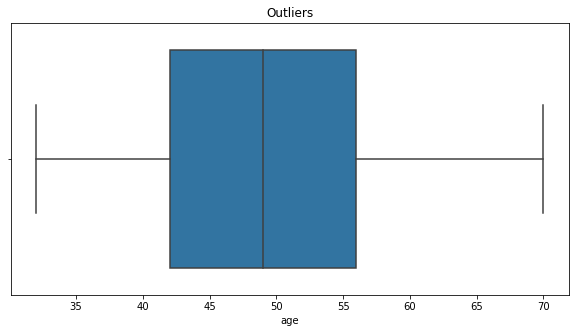

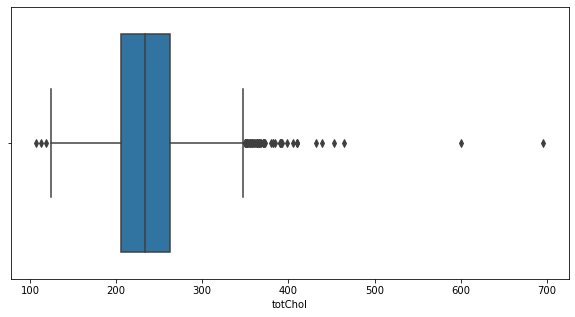

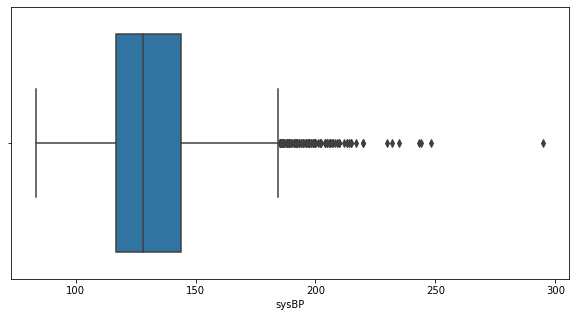

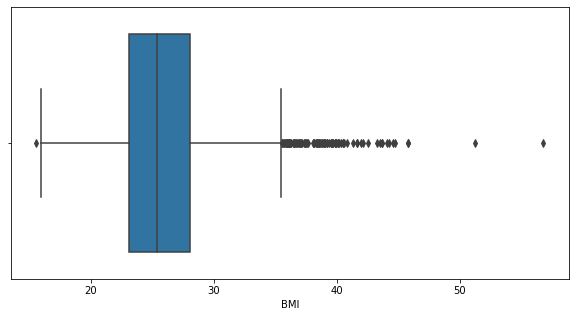

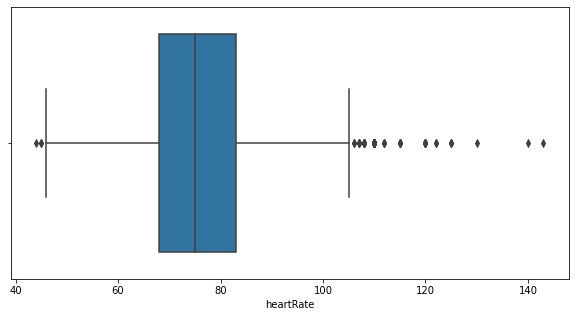

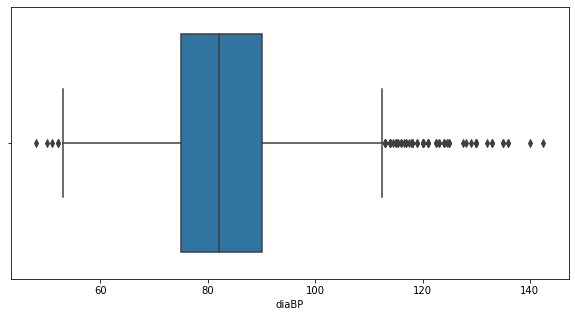

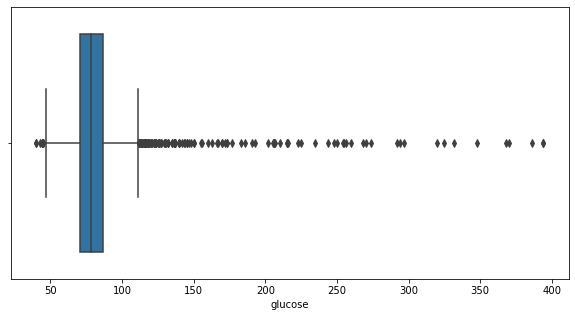

In [9]:
data_cols=['age','totChol','sysBP','BMI','heartRate','diaBP','glucose']
plt.rcParams['figure.figsize'] = (10,5)
plt.title('Outliers')
for i in data_cols:
    data[i]
    sns.boxplot(data[i])
    plt.show()

In [10]:
#Let us calculate the Z Score for the above data.
from scipy import stats
data_list=[]
for i in data_cols:
    z=np.abs(stats.zscore(data[i]))
    data_list.extend(np.where(z>3)[0])

In [11]:
#Removing the outliers
final_data = data.loc[np.setdiff1d(data.index.tolist(),data_list)].copy()

In [12]:
final_data.shape

(4171, 16)

We have now removed all the outliers present in the dataset. After doing this, we are now left with 4171 rows in the dataset. Now that we have checked for duplicate values and removed all the outliers, let's remove the null values.

In [13]:
final_data.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              51
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             49
sysBP                0
diaBP                0
BMI                 18
heartRate            1
glucose            384
TenYearCHD           0
dtype: int64

In [14]:
final_data.TenYearCHD.value_counts()

0    3561
1     610
Name: TenYearCHD, dtype: int64

We observe that there are 3561 values with TenYearCHD (Target variable) as 0 and 610 values with target variable 1.

In [15]:
null_0 = final_data[final_data.TenYearCHD==0]
null_1 = final_data[final_data.TenYearCHD==1]

null_0.isna().sum()

male                 0
age                  0
education           89
currentSmoker        0
cigsPerDay          27
BPMeds              41
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             40
sysBP                0
diaBP                0
BMI                  9
heartRate            0
glucose            335
TenYearCHD           0
dtype: int64

In [16]:
null_1.isna().sum()

male                0
age                 0
education          16
currentSmoker       0
cigsPerDay          2
BPMeds             10
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol             9
sysBP               0
diaBP               0
BMI                 9
heartRate           1
glucose            49
TenYearCHD          0
dtype: int64

We note that after cleaning the data for outliers, we have a significant number of null values for the dataset rows with TenYearCHD 0 and 1. So removing all these null values can result in the loss of the dataset values which have target values of 1. A solution that was suggested by the group members to this is to only remove those null values that have target values of 0 and fill the null values for values having target values of 1.

In [17]:
#final_data = pd.concat([final_data, null_0, null_0]).drop_duplicates(keep=False)
#final_data = final_data.drop(final_data[(final_data.TenYearCHD==0 & final_data.isna())].index)
#final_data = final_data[~(final_data.TenYearCHD==0 & final_data.isna())]
df = null_0.dropna()
final_data = pd.concat([df,null_1]).drop_duplicates()

In [18]:
final_data.isna().sum()

male                0
age                 0
education          16
currentSmoker       0
cigsPerDay          2
BPMeds             10
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol             9
sysBP               0
diaBP               0
BMI                 9
heartRate           1
glucose            49
TenYearCHD          0
dtype: int64

In [19]:
final_data['education'] = final_data['education'].fillna(final_data['education'].mode().values[0])
final_data['cigsPerDay'] = final_data['cigsPerDay'].fillna(round(final_data['cigsPerDay'].mean()))
final_data['BPMeds'] = final_data['BPMeds'].fillna(final_data['BPMeds'].mode().values[0])
final_data['totChol'] = final_data['totChol'].fillna(round(final_data['totChol'].mean()))
final_data['BMI'] = final_data['BMI'].fillna(round(final_data['BMI'].mean()))
final_data['heartRate'] = final_data['heartRate'].fillna(round(final_data['heartRate'].mean()))
final_data['glucose'] = final_data['glucose'].fillna(round(final_data['glucose'].mean()))

In [20]:
final_data.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [21]:
final_data.shape

(3680, 16)

We have now removed all the outliers and we have filled the values of those with TenYearCHD = 1 with their respective mean or median values. We are now left with 3680 rows. Now that we have performed the cleaning, we can go ahead with EDA on the dataset.

In [22]:
#let's assign the cleaned dataset as the final data set.
data = final_data

## Exploratory Data Analysis

### Univariate Analysis

We shall now begin with univariate analysis on the cleaned data. We shall first, plot the numerical values and look for their frquencies in the dataset.

<AxesSubplot:ylabel='Frequency'>

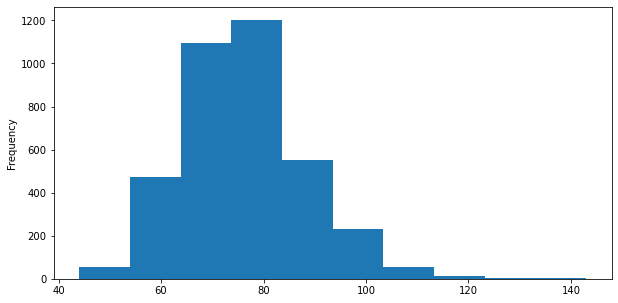

In [23]:
#Histogram of Heart Rate
data['heartRate'].plot.hist()

From the above histogram, we see that most of the heartRate values are in the range of 60 and 110.

<AxesSubplot:ylabel='Frequency'>

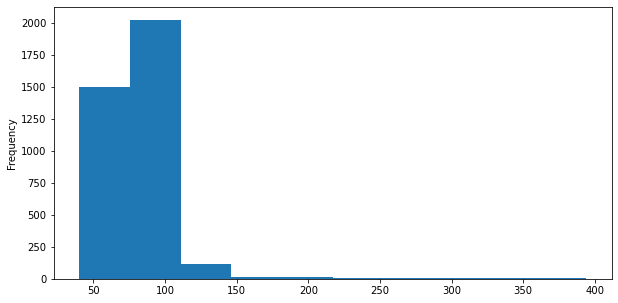

In [24]:
#Histogram of Glucose
data['glucose'].plot.hist()

From the above histogram, we see that most of the glucose is in the range of 50 and 150.

<AxesSubplot:ylabel='Frequency'>

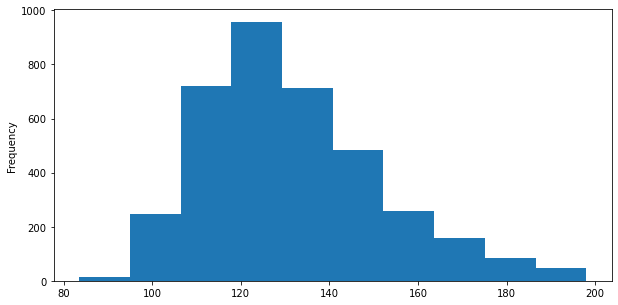

In [25]:
#Histogram of Systolic Blood Pressure
data['sysBP'].plot.hist()

From the above histogram, we see that most of the sysBP is in the range of 90 and 190.

<AxesSubplot:ylabel='Frequency'>

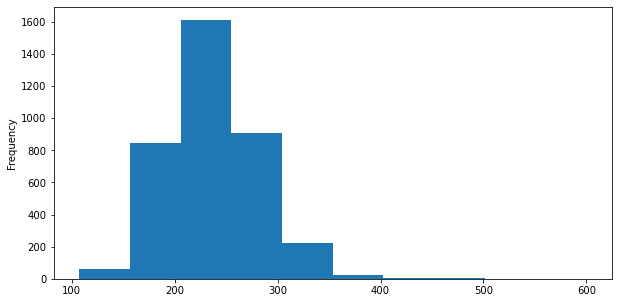

In [26]:
#Histogram of Total Cholesterol Level
data['totChol'].plot.hist()

From the above histogram, we see that most of the totChol is in the range of 110 and 350.

<AxesSubplot:ylabel='Frequency'>

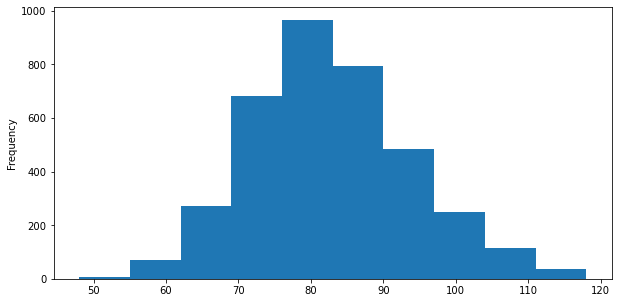

In [27]:
#Histogram of Diastolic Blood Pressure
data['diaBP'].plot.hist()

From the above histogram, we see that most of the diaBP is in the range of 60 and 115.

<AxesSubplot:ylabel='Frequency'>

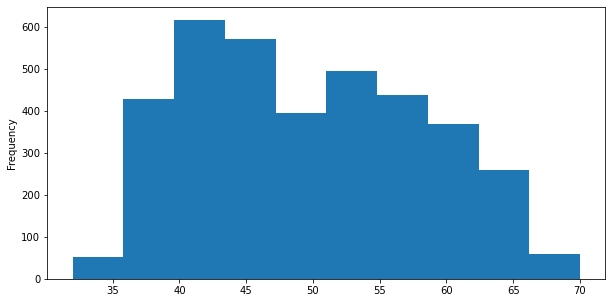

In [28]:
#Histogram of Age
data['age'].plot.hist()

From the above histogram, we see that most of the age is in the range of 35 and 70.

<AxesSubplot:ylabel='Frequency'>

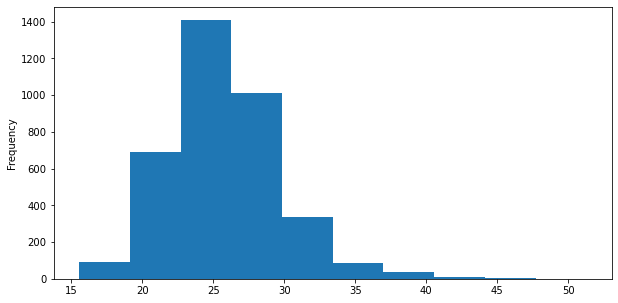

In [29]:
# this is univariate analysis
data['BMI'].plot.hist()

From the above histogram, we see that most of the BMI is in the range of 15 and 40.

### Bivariate Analysis

We shall now perform bivariate analysis on the dataset. We start with comparing the categorical dataset variables with the target variable (TenYearCHD)

male vs TenYearCHD


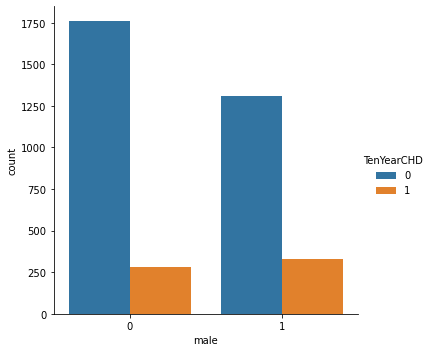

education vs TenYearCHD


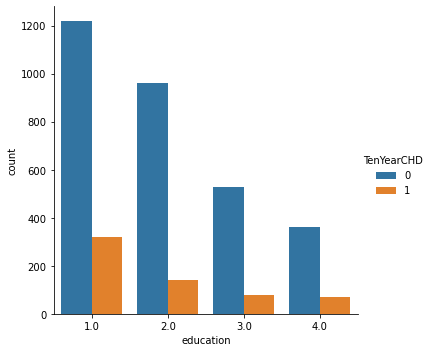

currentSmoker vs TenYearCHD


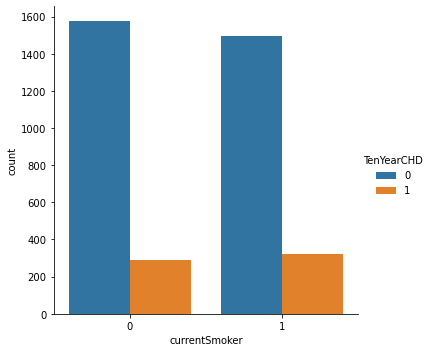

BPMeds vs TenYearCHD


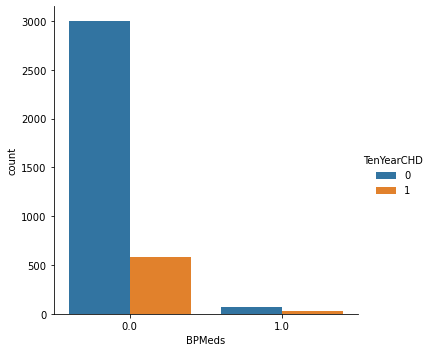

prevalentStroke vs TenYearCHD


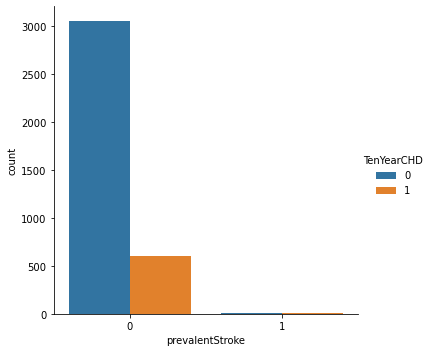

prevalentHyp vs TenYearCHD


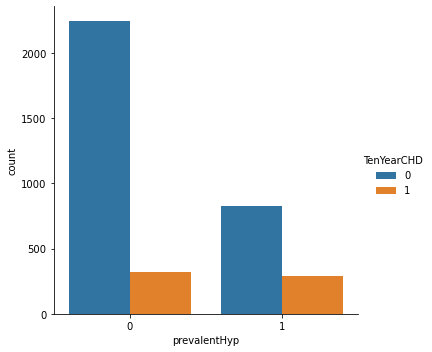

diabetes vs TenYearCHD


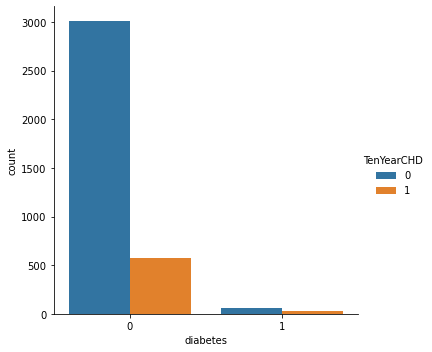

In [30]:
test_cols = ['male','education','currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']

for i in test_cols:
    print(i,'vs TenYearCHD')
    plt.rcParams['figure.figsize'] = (20,5)
    sns.catplot(x=i , hue ="TenYearCHD", kind="count", data= data)
    plt.show()

From the above plots, we observe that
* Males are slightly more prone than females.
* People with least education level are more prone.
* Current smokers being prone is slightly higher.
* People who don't take BPMeds are more prone.
* Surprisingly, people with no prevalent strokes are more prone.
* Almost similar for people with prevalent hypertension.
* Again, surprisingly, people who are not diabetic are more prone.

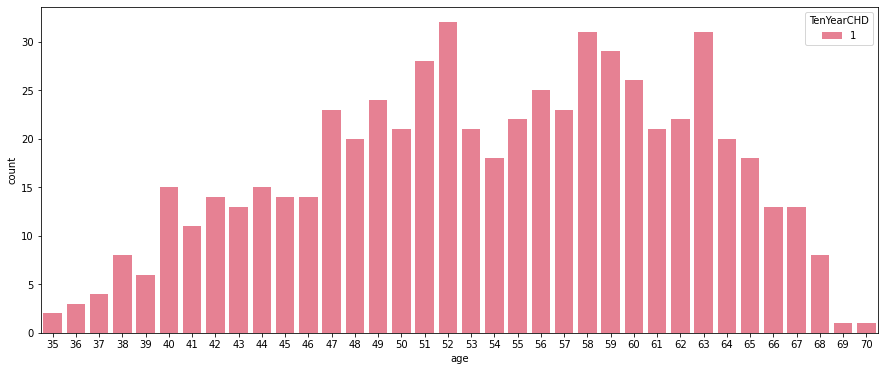

In [31]:
positive_cases = data[data['TenYearCHD'] == 1]
plt.figure(figsize=(15,6))
sns.countplot(x='age',data = positive_cases, hue = 'TenYearCHD', palette='husl')
plt.show()

People in their 40s-70s are more prone to have a heart disease.

<Figure size 1080x720 with 0 Axes>

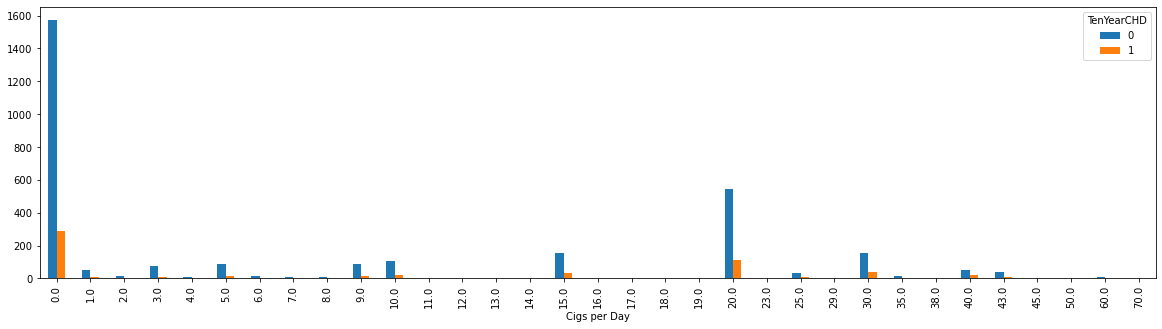

In [32]:
plt.figure(figsize=(15,10))
pd.crosstab(data.cigsPerDay,data.TenYearCHD).plot(kind='bar')
plt.xlabel('Cigs per Day')
plt.show()

We see that the risk of CHD is high even for people who smoke 0 cigs per day.

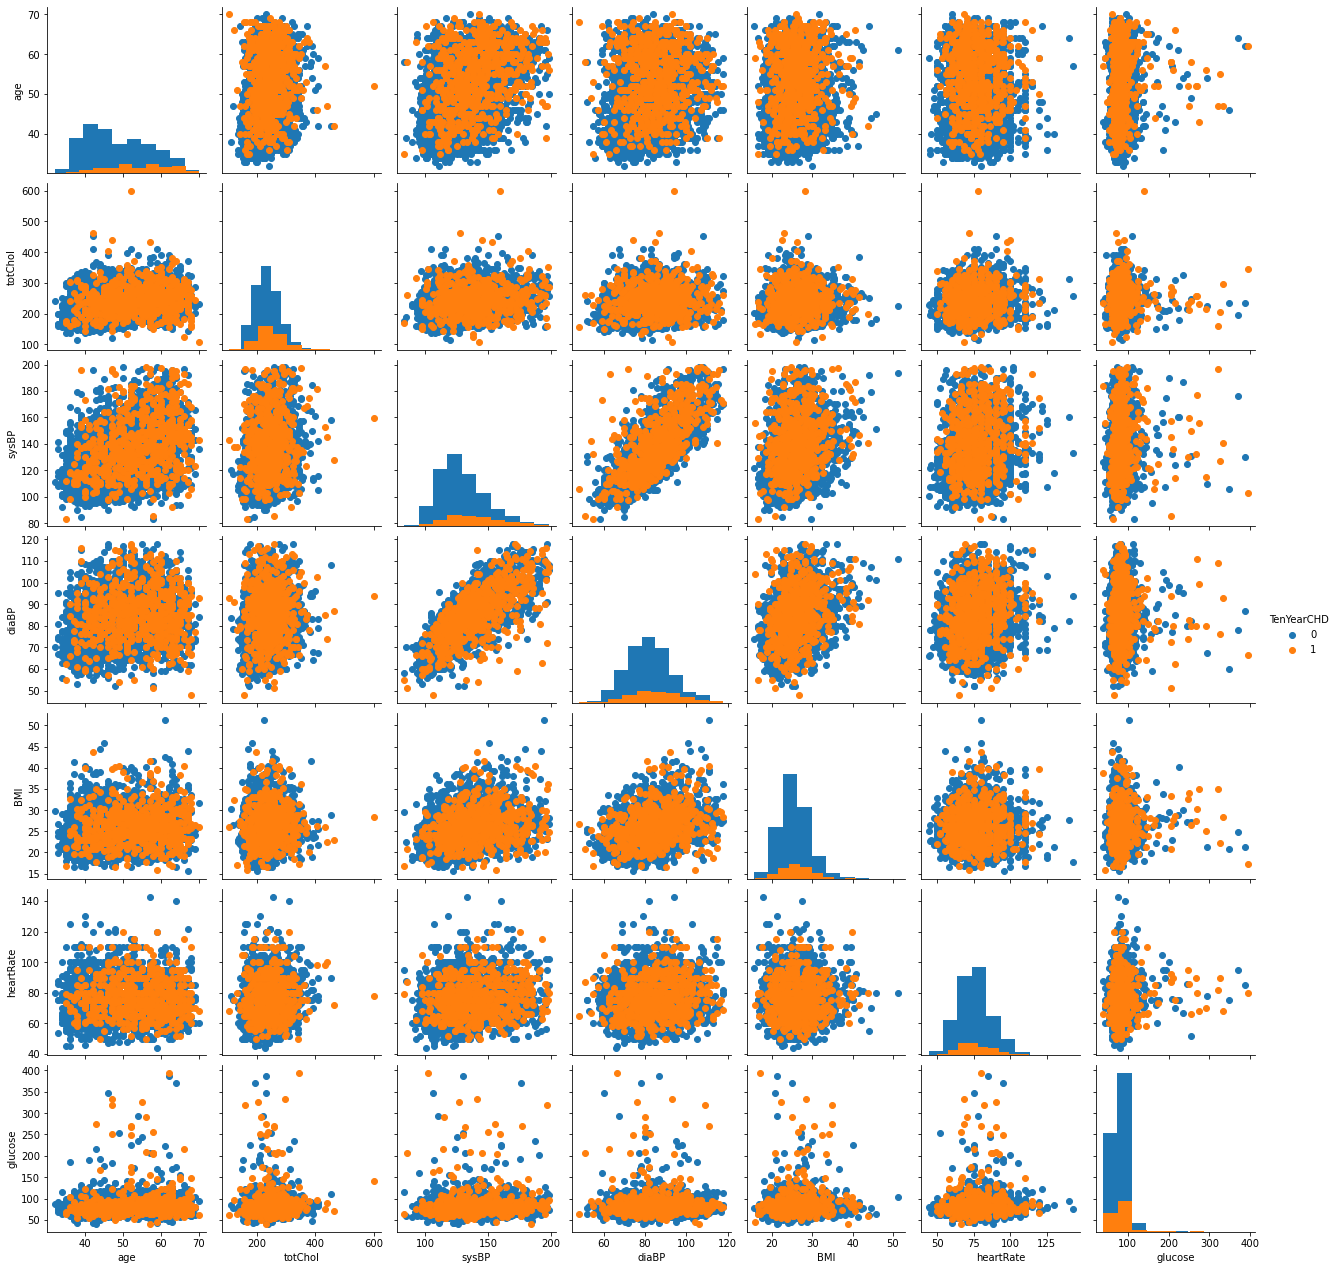

In [33]:
num_cols =['age', 'totChol','sysBP','diaBP','BMI','heartRate','glucose','TenYearCHD']
g = sns.PairGrid(data[num_cols], hue='TenYearCHD')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()

From the pair plot, we observe that most of the variables are non0linear.

## Correlation Analysis

### Heatmap of Correlation Matrix

We shall now generate a heatmap for the correlation matrix of the dataset. This will enable us to look at the correlation between two variables and also help us in analyzing the necessary valiables for our model.

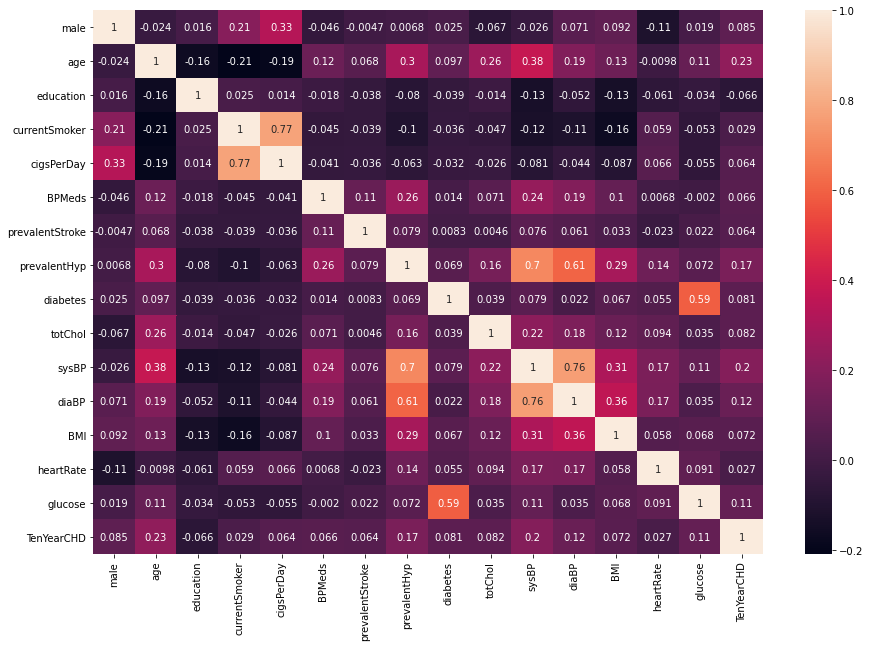

In [34]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot = True)
plt.show()

From the above heatmap, we observe that there is a higher positive correlation in 'age', 'education', 'BPMeds', 'prevalentHyp', 'sysBP', 'diaBP', 'BMI' and 'glucose' for TenYearCHD (target variable).

### Muliticollinearity

To remove the multicollinear values, we shall calculate the Variance Inflation Factor (VIF) for the varaibles.

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

X = data
vif_scores = calc_vif(X)
vif_scores.sort_values(by = ['VIF'])

variables         VIF
6   prevalentStroke    1.028411
5            BPMeds    1.125128
15       TenYearCHD    1.306646
8          diabetes    1.541620
0              male    2.192035
7      prevalentHyp    2.357049
4        cigsPerDay    4.341023
2         education    4.663667
3     currentSmoker    4.983723
14          glucose   21.163040
9           totChol   32.506337
13        heartRate   39.526677
1               age   41.907612
12              BMI   46.900164
11            diaBP  143.083658
10            sysBP  151.201273

'glucose', 'totChol', 'BMI', 'heartRate', 'age', 'diaBP', 'sysBP' have a VIF > 10. These values can be dropped from the dataset.

## Chi Squared Test for catergorical values

We will now perform the chi squared test for the catergorical variables for the analysis of important variables.

In [36]:
c_cols = ['male','education','currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes']
c_data = data[c_cols]
selector = SelectKBest(chi2,k=5)
selector.fit(c_data,data['TenYearCHD'])
cols = selector.get_support(indices=True)

dfscores = pd.DataFrame(selector.scores_)
dfcolumns = pd.DataFrame(c_data.columns)
featurescores = pd.concat([dfcolumns,dfscores], axis=1)
featurescores.columns = ['Features', 'Scores']
featurescores = featurescores.sort_values(by='Scores')
print(featurescores)

trace = go.Bar(x=featurescores['Features'], y=featurescores['Scores'])
sdata = [trace]

layout = go.Layout(title='Chi Score test for the categorical features', xaxis=dict(title = 'Feature Name'), yaxis=dict(title = 'Score'), hovermode='closest')
fig = go.Figure(data=sdata,layout=layout)
pyo.iplot(fig)

          Features     Scores
2    currentSmoker   1.616751
1        education   8.623428
4  prevalentStroke  14.856126
0             male  14.911299
3           BPMeds  15.642774
6         diabetes  23.341029
5     prevalentHyp  73.611612


We observe that 'prevalentHyp', 'diabetes', 'BPMeds', 'male', 'prevalentStroke' are highly correlated categorical data values. We also see that 'currentSmoker' and 'education' have a score lower than 10. 'currentSmoker' and 'education' are not important variable as per graph.

### Removing non-important variables

From the above chi squared test and VIF test, we will select only those columns that are important for the prediction.

In [37]:
final_data_columns = ['male','diabetes','BPMeds','prevalentHyp','prevalentStroke','cigsPerDay','TenYearCHD']
data = data[final_data_columns]

In [38]:
data.shape

(3680, 7)

After cleaning the data and removing the non-important variables after performing EDA, we now have scaled down the original dataset to 3680 rows and 8 columns.

## Models

In [39]:
data.head()

male  diabetes  BPMeds  prevalentHyp  prevalentStroke  cigsPerDay  \
0     1         0     0.0             0                0         0.0   
1     0         0     0.0             0                0         0.0   
2     1         0     0.0             0                0        20.0   
4     0         0     0.0             0                0        23.0   
5     0         0     0.0             1                0         0.0   

   TenYearCHD  
0           0  
1           0  
2           0  
4           0  
5           0

In [40]:
# splitting the dependent and independent variables

x = data.iloc[:,:6]
y = data.iloc[:,6]

print(x.shape,y.shape)


(3680, 6) (3680,)


In [41]:
# splitting the dataset into training and test sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 6)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2208, 6)
(2208,)
(1472, 6)
(1472,)


# Logistical Regression

In [42]:
from sklearn.linear_model import  LogisticRegression

# creating a model
model = LogisticRegression()

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# calculating the classification accuracies
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))
  

Training Accuracy : 0.8419384057971014
Testing Accuracy : 0.8226902173913043


In [43]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix,f1_score

In [44]:
confusion_matrix(y_pred, y_test)
#confusion matrix of above model

#if we train the model using logistic regression, it is predicting 261 rows of data incorrectly.

array([[1210,  261],
       [   0,    1]], dtype=int64)

In [45]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90      1471
           1       0.00      1.00      0.01         1

    accuracy                           0.82      1472
   macro avg       0.50      0.91      0.46      1472
weighted avg       1.00      0.82      0.90      1472



### according to above report, precision of predicting a patient not having disease is 1.00 and having the disease is 0.00

### and recall of predicting patient not affected with disease is 0.82 whereas predicting patient affected with disease is 1.00


 f1 score is 0.90



## SVM

Text(0.5, 1.1, 'Confusion matrix SVM\n')

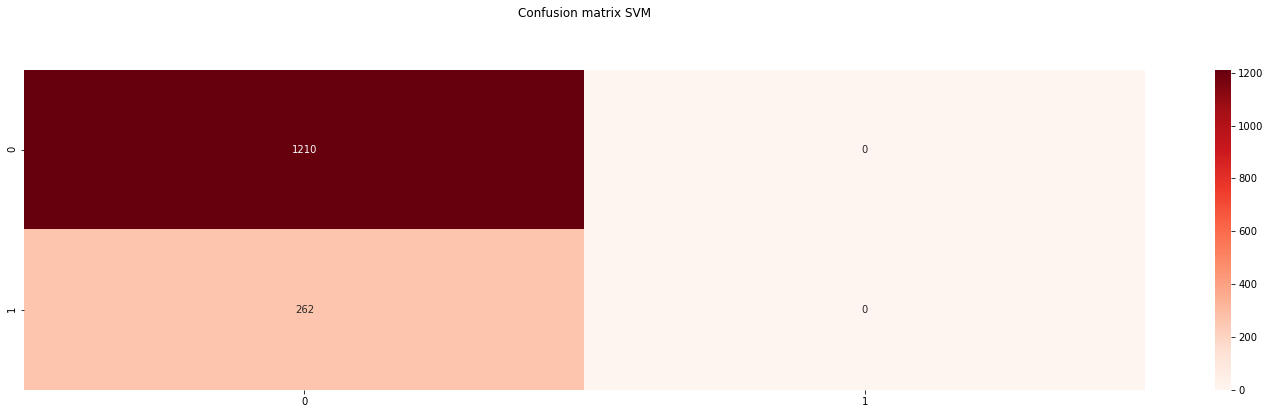

In [46]:
from sklearn.svm import SVC
svm = SVC()

#fit model
svm.fit(x_train, y_train)

normalized_df_svm_pred = svm.predict(x_test)

# plotting confusion matrix SVM

cnf_matrix_svm =confusion_matrix(y_test, normalized_df_svm_pred)

sns.heatmap(pd.DataFrame(cnf_matrix_svm), annot=True,cmap="Reds" , fmt='g')
#ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix SVM\n', y=1.1)

In [47]:
confusion_matrix(y_test, normalized_df_svm_pred)

array([[1210,    0],
       [ 262,    0]], dtype=int64)

In [48]:
print(classification_report(normalized_df_svm_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90      1472
           1       0.00      0.00      0.00         0

    accuracy                           0.82      1472
   macro avg       0.50      0.41      0.45      1472
weighted avg       1.00      0.82      0.90      1472



c:\users\binnu\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



f1 score is 0.901

## KNN


In [49]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier(n_neighbors=5) 
#doing with 5 neighbors
knn_model.fit(x_train,y_train)
#training the data
y_pred=knn_model.predict(x_test)

In [50]:
dt_accuracy = accuracy_score(y_pred, y_test)*100
print('Accuracy score for Decision tree is %f'%dt_accuracy)

Accuracy score for Decision tree is 79.551630


In [51]:
print(confusion_matrix(y_test,y_pred))

[[1147   63]
 [ 238   24]]


In [52]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.95      0.83      0.88      1385
           1       0.09      0.28      0.14        87

    accuracy                           0.80      1472
   macro avg       0.52      0.55      0.51      1472
weighted avg       0.90      0.80      0.84      1472



f1 score of knn model is 0.875


## Random Forest

In [53]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier 

model=RandomForestClassifier()
hyperparameters={'bootstrap':[True,False],'criterion':['gini','entropy'],'max_depth':np.linspace(1,120,60,endpoint=True,dtype=int),'min_samples_split':np.linspace(1,120,60,endpoint=True,dtype=int),'min_samples_leaf': np.linspace(0.1,0.5,5,endpoint=True),'n_estimators':[200,400,600,800,1000,1200,1400,1600,1800,2000],'max_features': ['auto','sqrt']}
rf_clf=RandomizedSearchCV(model,hyperparameters)

In [54]:
best_model = rf_clf.fit(x_train, y_train)

y_pred=best_model.predict(x_test)
#y_pred_proba=best_model.predict_proba(x_test)

In [55]:
rf_accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy score for Random Forest is',rf_accuracy)
confusion_matrix(y_test, y_pred)

Accuracy score for Random Forest is 82.20108695652173


array([[1210,    0],
       [ 262,    0]], dtype=int64)

In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90      1210
           1       0.00      0.00      0.00       262

    accuracy                           0.82      1472
   macro avg       0.41      0.50      0.45      1472
weighted avg       0.68      0.82      0.74      1472



c:\users\binnu\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



1)According to the report precision of predicting a patient not having disease is 0.83 and having the disease is 0.

2)According to the report the recall of predicting patient not affected with disease is 1 whereas predicting patient affected with disease is 0

3)f1 score is 0.901

4)Accuracy is 83%

## Decision Tree


In [57]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
#Feature Selected for presentation
feature_data = data[['male', 'cigsPerDay', 'BPMeds', 'prevalentStroke','prevalentHyp','diabetes']]
x = np.asarray(feature_data)
x[0:5]

data['TenYearCHD'] = data['TenYearCHD'].astype('int')
y = np.asarray(data['TenYearCHD'])
y [0:5]

<ipython-input-57-0c1e69a53c86>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array([0, 0, 0, 0, 0])

In [58]:
dt_clf = DecisionTreeClassifier(min_samples_split=40, random_state=0) 
#Fitting the model
dt_clf.fit(x_train, y_train)
y_pred_dt = dt_clf.predict(x_test)
y_pred_dt[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [59]:
dt_accuracy = accuracy_score(y_pred_dt, y_test)*100
print('Accuracy score for Decision tree is %f'%dt_accuracy)

Accuracy score for Decision tree is 82.133152


In [60]:
confusion_matrix(y_pred_dt, y_test)

array([[1204,  257],
       [   6,    5]], dtype=int64)

In [61]:
print(classification_report(y_pred_dt, y_test))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90      1461
           1       0.02      0.45      0.04        11

    accuracy                           0.82      1472
   macro avg       0.51      0.64      0.47      1472
weighted avg       0.99      0.82      0.90      1472



f1-score of the model is 0.89


## Observations

In [65]:
m=[['Logistic Regression',0.9],['KNN',0.875],['SVM',0.901],['decision tree',0.901],['Random forest',0.89]]

In [68]:
pd.DataFrame(m,columns=['model','f1 score'])

model  f1 score
0  Logistic Regression     0.900
1                  KNN     0.875
2                  SVM     0.901
3        decision tree     0.901
4        Random forest     0.890

SVM and decision tree are having highest f1 score.So they are best models to predict tenyearCHD